# linear resgression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('AI_Data/landPrice.csv')
df.head()


,Area,Price
0,100,12
1,120,20
2,120,17
3,120,15
4,150,25


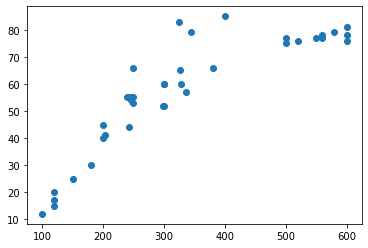

In [2]:
Xd = df['Area']
Yd = df['Price']
plt.scatter(Xd, Yd)
plt.show()

for simplicity we will work on small sample of the data be it m=5

In [3]:
Xd = df['Area']
Yd = df['Price']
X = list(Xd[0:])
Y = list (Yd[0:])



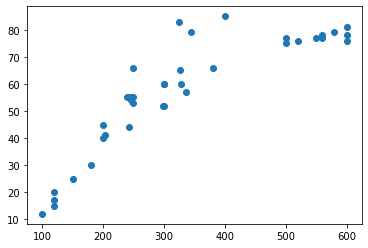

In [4]:
X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()


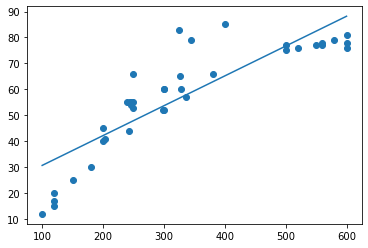

In [5]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(X, Y)

def myfunc(X):
    return slope * X + intercept

mymodel = list(map(myfunc, X))

plt.scatter(X, Y)
plt.plot(X, mymodel)
plt.show()

Predict

In [6]:
price = myfunc(180)
print(price)

39.891771643399935


## Polynomial Regression

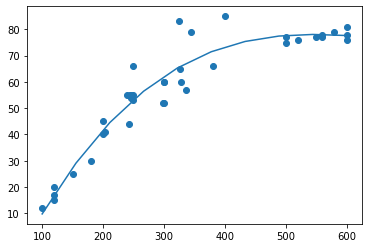

In [7]:
mymodel = np.poly1d(np.polyfit(X, Y, 3))

myline = np.linspace(100, 600, 10)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()

In [8]:
price = mymodel(180)
print (price)

36.33420505151777


# over fitting

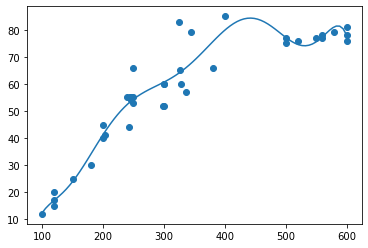

In [9]:
mymodel = np.poly1d(np.polyfit(X, Y, 8))

myline = np.linspace(100, 600, 90)

plt.scatter(X, Y)
plt.plot(myline, mymodel(myline))
plt.show()

In [10]:
price = mymodel(181)
print (price)

34.44150355042905


# Multiple Linear regression

In [11]:
import pandas
from sklearn import linear_model
df = pandas.read_csv("AI_Data/co2_sum.csv")
Lis = list (df)
print (Lis)

['make', 'model', 'eng_size', 'cylender', 'co2']


In [14]:
X = df[['eng_size', 'cylender']]
y = df['co2']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print('coefficients:  ', regr.coef_)



coefficients:   [27.69484539  7.75884576]
LinearRegression()


In [40]:
pred = regr.predict([[2.3, 4]])
print (pred)

[205.00222919]


# K mean

In [41]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
#style.use("ggplot")
#%matplotlib inline

In [45]:
data = pd.read_csv('AI_Data/Kmean.csv')
data.head()


,x,y
0,1.0,3.0
1,2.0,4.0
2,3.0,3.0
3,6.0,20.0
4,6.2,21.0


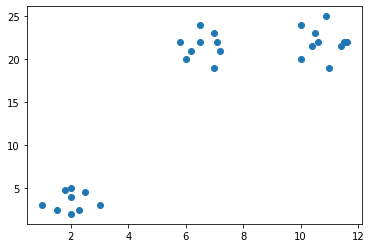

In [46]:
X = data['x']
Y = data['y']
plt.scatter(X,Y)


In [23]:
kmeans = KMeans(n_clusters=3).fit(data)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[10.79       22.        ]
 [ 2.01111111  3.47777778]
 [ 6.58888889 21.55555556]]
[1 1 1 2 2 2 2 2 2 2 0 0 0 0 0 0 0 1 1 1 1 1 1 2 0 0 0 2]


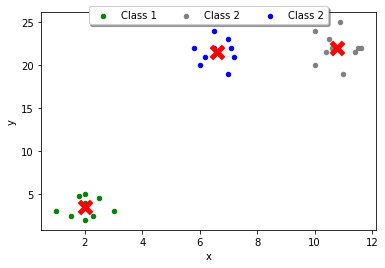

In [48]:
data['labels'] = labels

group1 = data[data['labels']==1].plot( kind='scatter', x='x', y='y', color='Green', label="Class 1" )
group2 = data[data['labels']==0].plot( kind='scatter', x='x', y='y', color='Gray', ax=group1, label="Class 2" )
group2 = data[data['labels']==2].plot( kind='scatter', x='x', y='y', color='Blue', ax=group1, label="Class 2" )
group1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, color='Red')

plt.show()